# Demand patterns and seasonality

Seasonal demand is a certain time series with repetitive or predictable patterns of demand, due to re-occurring seasonal events. These patterns can re-occur over days, weeks, months ... and can make it harder for businesses to forecast future demand trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns


from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
#import timeit

In [2]:
phil = pd.read_csv("cleaned_Phil.csv")
phil.count()

/Users/daiwei/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


trip_id                1678842
duration               1678842
start_time             1678842
end_time               1678842
start_station          1678842
end_station            1678842
bike_id                1678842
plan_duration          1678842
trip_route_category    1678842
passholder_type        1678842
bike_type              1678842
Date_s                 1678842
Weekday_s              1678842
Hour_s                 1678842
Date_e                 1678842
Weekday_e              1678842
Hour_e                 1678842
start_coordinates      1678842
end_coordinates        1678842
dtype: int64

In [3]:
phil.sort_values(["bike_id","Date_s"], inplace=True)
phil.set_index(pd.DatetimeIndex(phil["Date_s"]),inplace=True)
phil.drop("Date_s", axis=1, inplace=True)

In [4]:
phil.head()

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_coordinates,end_coordinates
Date_s,,,,,,,,,,,,,,,,,,
2021-01-03,365315729,5,2021-01-03 15:03:00,2021-01-03 15:08:00,3211,3054,102,30,One Way,Indego30,standard,6,15,2021-01-03,6,15,"39.971722,-75.170601","39.962502,-75.174202"
2021-01-03,365351230,4,2021-01-03 22:31:00,2021-01-03 22:35:00,3054,3014,102,365,One Way,Indego365,standard,6,22,2021-01-03,6,22,"39.962502,-75.174202","39.958858,-75.173691"
2021-01-04,365375491,7,2021-01-04 18:00:00,2021-01-04 18:07:00,3014,3163,102,30,One Way,Indego30,standard,0,18,2021-01-04,0,18,"39.958858,-75.173691","39.949741,-75.180969"
2021-01-30,366822049,27,2021-01-30 15:18:00,2021-01-30 15:45:00,3004,3057,102,1,One Way,Day Pass,standard,5,15,2021-01-30,5,15,"39.953781,-75.163742","39.96439,-75.179871"
2021-02-05,367159233,17,2021-02-05 09:22:00,2021-02-05 09:39:00,3057,3111,102,365,One Way,Indego365,standard,4,9,2021-02-05,4,9,"39.96439,-75.179871","39.977791,-75.213226"


In [6]:
# Let's explore fleet size

fleet_size = len(phil["bike_id"].unique())

print("The fleet consists of {} bikes (for the observed time frame)".format(fleet_size))

The fleet consists of 4604 bikes (for the observed time frame)


## Availability over time: month,days and hours

Now we are going to explore fleet availability in the week and day by checking how many unique bikes are available for each day and hour of day.

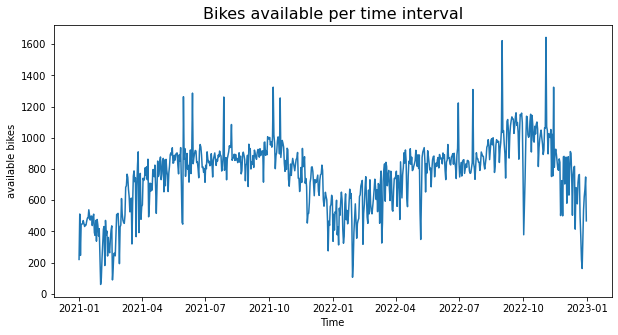

In [8]:
# Availability over months 

phil_Date_avail = phil.groupby("Date_s")["bike_id"].nunique() # this counts unique vehicles per 7-min time interval

fig,ax = plt.subplots(figsize=(10,5)) 

ax.plot(phil_Date_avail)
ax.set_title("Bikes available per time interval",fontsize=16)
ax.set_xlabel("Time")
ax.set_ylabel("available bikes")

fig.savefig("availableBikes.pdf")
plt.show()

The high availability is always low demand period, when there are many bikes available we have low demand . So for example when we are going to plot the demand is sort of the inverse. The higher aiailability is low demand periods. At the lowers peaks of the graph : low availability ones are high demands are typically on the afternoon etc..

Now we can look how it looks for typical week or how it looks for typcial hours: you can just select points but then you will miss variance and distributions over days so that's were the box plot come ...

In [9]:
# Availability by day of week (0 = Monday, 6 = Sunday)

phil_weekday_avail = phil.groupby(["Date_s","Weekday_s"])["bike_id"].nunique()
phil_weekday_avail = pd.DataFrame(phil_weekday_avail)

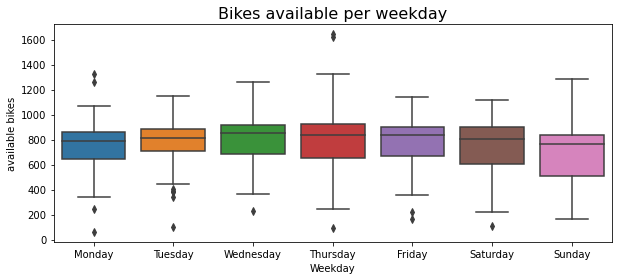

In [10]:
fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=phil_weekday_avail.index.get_level_values(1), y=phil_weekday_avail["bike_id"],ax=ax)

ax.set_title("Bikes available per weekday",fontsize=16)
ax.set_xlabel("Weekday")
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

ax.set_ylabel("available bikes")

fig.savefig("availabilityByWeekday.pdf")
plt.show()

In [11]:
# Availability by time of day 

phil_time_avail = phil.groupby(["Date_s","Hour_s"])["bike_id"].nunique()
phil_time_avail = pd.DataFrame(phil_time_avail)


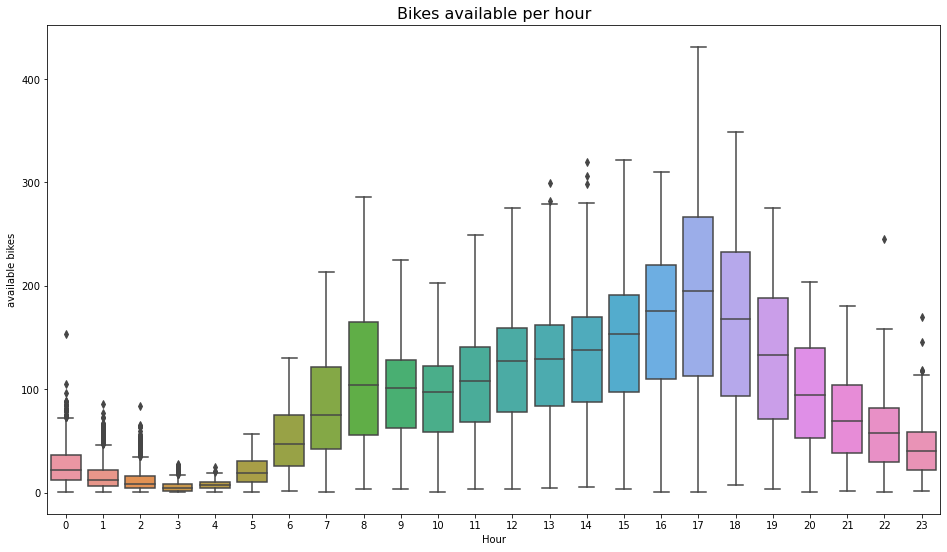

In [12]:
fig,ax = plt.subplots(figsize=(16,9)) 

sns.boxplot(x=phil_time_avail.index.get_level_values(1), y=phil_time_avail["bike_id"],ax=ax)

ax.set_title("Bikes available per hour",fontsize=16)
ax.set_xlabel("Hour")
ax.set_ylabel("available bikes")

fig.savefig("availabilityByHour.pdf")
plt.show()

We can see how the availability increase over the night hours and is reduce on work hours as we have more demand